# Data Science Final Report
Marshal Nink - mrn61

Abdullelah Abualshour - aha59

## Project Goals
- In our project, we have a data set that contains more than 8,500 cities in the United States with the number of crimes that happened in each city in 2016. 
- It is detailed and contains the number of violent crimes (murder, rape, robbery, aggravated assault) and property crimes (burglary, larceny-theft, motor vehicle theft, arson) during 2016. 
- We want to explore the relationship between populations and different types of crimes, as well as determining the safest and most dangerous states and cities within each population range. 
- We also observed and visualized patterns related to violent crimes compared to property crimes in cities with relatively similar populations.

## Data Collection and Preprocessing Challanges
The dataset has been made available by the FBI on their online database:
https://ucr.fbi.gov

We faced some challenges after acquiring the data. These challanges during the data preprocessing included:
- Renaming files to represent state names.
- Removing unnecessary comments from the file.
- Removing unnecessary nesting in some of the CSV files.
- Merging columns that represented the same category of crime.
- Renaming column headers.
- Filling in for missing data (add zeros to blank entries).
- Removing commas in some of the numbers (change from 5,000 to 5000) in order to cast to float values.
- Making sure column headers are consistent throughout the dataset.

## Machine Learning Application 
- This data can be used to predict crime statistics in U.S. cities. This could help local governments and authorities better allocate resources and personnel to prevent future crimes or better prepare for crimes in specific cities. 
- By predicting an approximation of rape crimes, authorities can use this machine learning model to be better prepared for future rape crimes.
- In project, we implemented two machine learning models that attempt to predict rape crimes for cities in the dataset based on analysis of features of other cities within the same dataset. We compared our predictions to the actual statistics in the dataset originally and concluded that our predictions were relatively close to the actual data in the test set, with around 40% accuracy using Perceptron which is acceptable given the dataset size.

### Notes: 
- The population data for each state is an aggregate of the populations for cities with the reported crime statistics. Our calculated populations may not accurately reflect the actual population of each state. Our analysis is based on the data made available by the FBI.
- The original crime statistics dataset represent the exact numbers of crimes, NOT crimes per capita.

__________________________________________________________________________________________________________

# Data Analysis

### Importing the dataset:

In [6]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Make sure you include the correct path to the dataset here
directory = os.path.join(".\\clean_data\\")
path = ".\\clean_data\\"
states = {}
state_names = []

# load a dataframe for every state into a dictionary
for root,dirs,files in os.walk(directory):
    for file in files:
        print ("file: " + file)
        if file.endswith(".csv"):
            f=open(path+file, 'r')
            state_names.append(file[:-4])
            states[file[:-4]]= pd.read_csv(f)
            #  perform calculation
            f.close()

# print (states)
# print (state_names)
# print (states['Wyoming'])

file: Alabama.csv
file: Alaska.csv
file: Arizona.csv
file: Arkansas.csv
file: California.csv
file: Colorado.csv
file: Connecticut.csv
file: Delaware.csv
file: District_of_Columbia.csv
file: Florida.csv
file: Georgia.csv
file: Hawaii.csv
file: Idaho.csv
file: Illinois.csv
file: Indiana.csv
file: Iowa.csv
file: Kansas.csv
file: Kentucky.csv
file: Louisiana.csv
file: Maine.csv
file: Maryland.csv
file: Massachusets.csv
file: Michigan.csv
file: Minnisota.csv
file: Mississippi.csv
file: Missouri.csv
file: Montana.csv
file: Nebraska.csv
file: Nevada.csv
file: New_Hampshire.csv
file: New_Jersey.csv
file: New_Mexico.csv
file: New_York.csv
file: North_Carolina.csv
file: North_Dakota.csv
file: Ohio.csv
file: Oklahoma.csv
file: Oregon.csv
file: Pennsylvania.csv
file: Rhode_Island.csv
file: South_Carolina.csv
file: South_Dakota.csv
file: Tennessee.csv
file: Texas.csv
file: Utah.csv
file: Vermont.csv
file: Virginia.csv
file: Washington.csv
file: West_Virginia.csv
file: Wisconsin.csv
file: Wyoming.cs

In [7]:
# Sum population for each state
state_populations = {}

for state, df in states.items():
    state_populations[state] = float(df['population'].sum())
    
print(state_populations)

{'Alabama': 2499649.0, 'Alaska': 475023.0, 'Arizona': 5232268.0, 'Arkansas': 1729204.0, 'California': 32747075.0, 'Colorado': 3671826.0, 'Connecticut': 2999155.0, 'Delaware': 262570.0, 'District_of_Columbia': 681170.0, 'Florida': 9885328.0, 'Georgia': 3726113.0, 'Hawaii': 995572.0, 'Idaho': 998921.0, 'Illinois': 10243355.0, 'Indiana': 3400015.0, 'Iowa': 1949689.0, 'Kansas': 1726035.0, 'Kentucky': 2401154.0, 'Louisiana': 1909852.0, 'Maine': 843135.0, 'Maryland': 1300377.0, 'Massachusets': 6558846.0, 'Michigan': 6473326.0, 'Minnisota': 3843399.0, 'Mississippi': 859499.0, 'Missouri': 3750564.0, 'Montana': 472883.0, 'Nebraska': 1244990.0, 'Nevada': 2546372.0, 'New_Hampshire': 1229123.0, 'New_Jersey': 8580636.0, 'New_Mexico': 1353474.0, 'New_York': 14214511.0, 'North_Carolina': 3428540.0, 'North_Dakota': 514342.0, 'Ohio': 6925776.0, 'Oklahoma': 2855546.0, 'Oregon': 2559979.0, 'Pennsylvania': 9179018.0, 'Rhode_Island': 1014904.0, 'South_Carolina': 1545608.0, 'South_Dakota': 504378.0, 'Tennes

### First, let's visualize the population of each state:

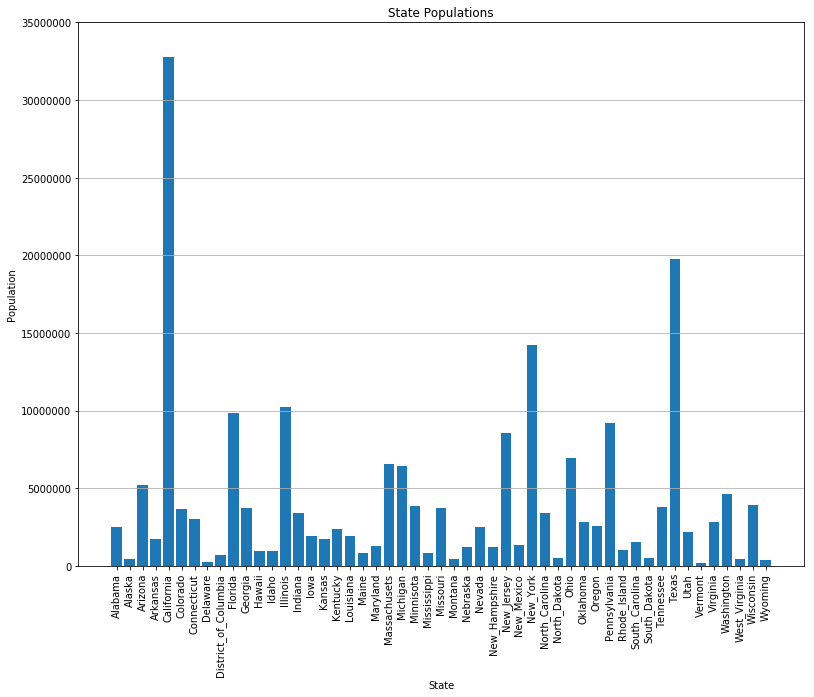

In [8]:
# plot populations as bar chart
objects = []
populations = []


for state, pop in state_populations.items():
    objects.append(state)
    populations.append(pop)

y_pos = np.arange(len(objects))

plt.figure(figsize=(13,10))

plt.ticklabel_format(style='plain')
plt.bar(y_pos, populations, align='center')
plt.xticks(y_pos, objects)
plt.ylim(0, 35000000)

plt.ylabel('Population')
plt.xlabel('State')
plt.title('State Populations')
plt.xticks(rotation=90)
plt.grid(axis='y')



plt.show()

## Simple statistics about populations:

### Mean:

In [9]:
np.mean(populations)

4070008.156862745

### Median:

In [10]:
print(list(state_populations.keys())[list(state_populations.values()).index(np.median(np.sort(populations)))])
print(np.median(np.sort(populations)))


Alabama
2499649.0


- It's interesting to see that half of the states' populations fall below 2.5 million yet the mean population for states is around 4 million. Looking at the chart, we can observe that the huge populations of the three states: California, Texas and New York skew the data tremendously.

# Comparing the 5 Most and Least Populated States

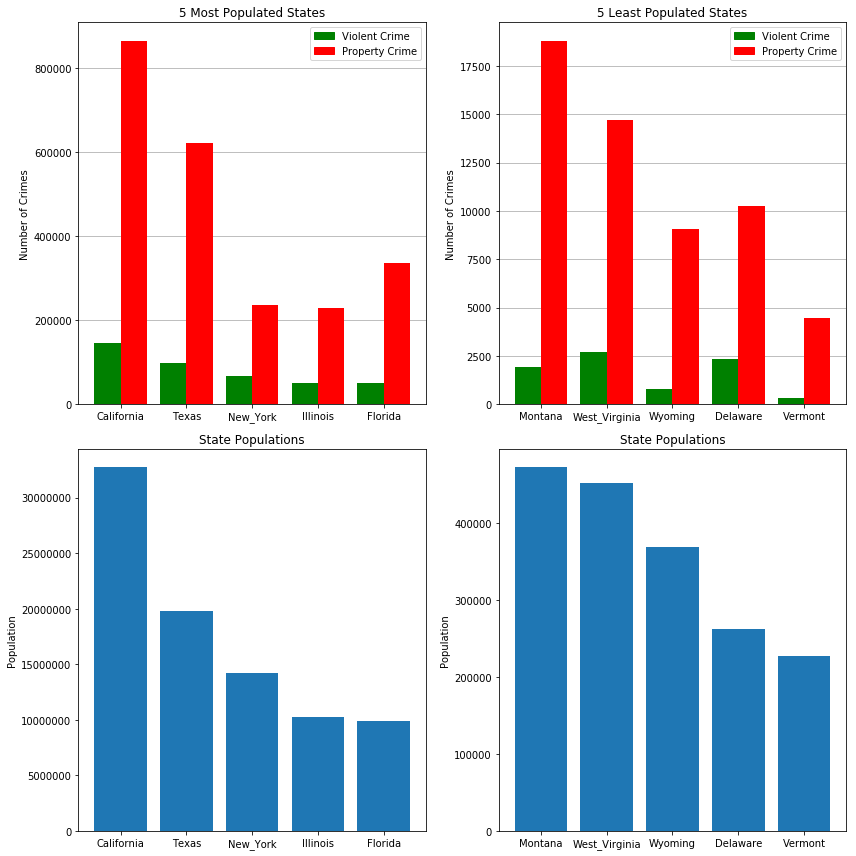

In [11]:
# Top (Most -> Least): California, Texas, New York, Illinois, Florida
# Bottom (Most -> Least): Montana, West Virginia, Wyoming, Delaware, Vermont
import matplotlib.patches as mpatches

state_violent_crimes = {}
state_property_crimes = {}

for state, df in states.items():
    state_violent_crimes[state] = float(df['violent_crime'].sum())
    state_property_crimes[state] = float(df['property_crime'].sum())
    
# print(state_violent_crimes)
# print(state_property_crimes)

###
### Crime Graphs
###

# set data
top = ['California', 'Texas', 'New_York', 'Illinois', 'Florida']
x = np.arange(len(top))
y1 = [state_violent_crimes['California'],state_violent_crimes['Texas'],state_violent_crimes['New_York'],state_violent_crimes['Illinois'],state_violent_crimes['Florida']]
y2 = [state_property_crimes['California'],state_property_crimes['Texas'],state_property_crimes['New_York'],state_property_crimes['Illinois'],state_property_crimes['Florida']]

plt.figure(figsize=(12,12))

# plot data
bar_width=0.4
plt.subplot(2,2,1)
plt.bar(x, y1, width=bar_width, color='green', zorder=2)
plt.bar(x + bar_width, y2, width=bar_width, color='red', zorder=2)

# set labels
plt.xticks(x + bar_width/2, top)
plt.title("5 Most Populated States")
plt.ylabel('Number of Crimes')
plt.grid(axis='y')

# legend
green_patch = mpatches.Patch(color='green', label='Violent Crime')
red_patch = mpatches.Patch(color='red', label='Property Crime')
plt.legend(handles=[green_patch, red_patch])


# bottom 5 plots
bottom = ['Montana', 'West_Virginia', 'Wyoming', 'Delaware', 'Vermont']
x = np.arange(len(bottom))
y3 = [state_violent_crimes['Montana'],state_violent_crimes['West_Virginia'],state_violent_crimes['Wyoming'],state_violent_crimes['Delaware'],state_violent_crimes['Vermont']]
y4 = [state_property_crimes['Montana'],state_property_crimes['West_Virginia'],state_property_crimes['Wyoming'],state_property_crimes['Delaware'],state_property_crimes['Vermont']]

plt.subplot(2,2,2)
plt.bar(x, y3, width=bar_width, color='green', zorder=2)
plt.bar(x + bar_width, y4, width=bar_width, color='red', zorder=2)

# set labels
plt.xticks(x + bar_width/2, bottom)
plt.title("5 Least Populated States")
plt.ylabel('Number of Crimes')

plt.grid(axis='y')

# legend
green_patch = mpatches.Patch(color='green', label='Violent Crime')
red_patch = mpatches.Patch(color='red', label='Property Crime')
plt.legend(handles=[green_patch, red_patch])



###
### Population Graphs
###

# top 5 #
top = ['California', 'Texas', 'New_York', 'Illinois', 'Florida']
x = np.arange(len(top))
y5 = [state_populations['California'],state_populations['Texas'],state_populations['New_York'],state_populations['Illinois'],state_populations['Florida']]

plt.subplot(2,2,3)
plt.ticklabel_format(style='plain')
plt.bar(x, y5, align='center')
plt.xticks(x, top)

plt.ylabel('Population')
plt.title('State Populations')


# bottom 5 #
bottom = ['Montana', 'West_Virginia', 'Wyoming', 'Delaware', 'Vermont']
x = np.arange(len(bottom))
y6 = [state_populations['Montana'],state_populations['West_Virginia'],state_populations['Wyoming'],state_populations['Delaware'],state_populations['Vermont']]

plt.subplot(2,2,4)
plt.ticklabel_format(style='plain')
plt.bar(x, y6, align='center')
plt.xticks(x, bottom)

plt.ylabel('Population')
plt.title('State Populations')


plt.tight_layout()
plt.show()

### All four graphs are ordered by decending population. The top two graphs indicate the violent and property crime numbers for the five most and five least populated states respectively. Below them are each state's population.

We have observed that even though the states are sorted in a descending order by population, this does not necessarily imply that because a certain state has a lower population, it will have a lower number of reported crimes. We can see this when comparing the crime numbers of Illinois and Florida. Florida has a slightly lower population than Illinois, but it has far more property crimes.

Likewise, as population decreases for the five least populated states, the number of reported violent and property crimes does not decrease from state to state. Instead, it jumps up and down with no specific pattern to follow. For example: Delaware has three times more violent crimes but only around 75% of the population of Wyoming.

Generally speaking, crime rates decrease as population decreases but it's not a guaranteed occurrence.


# Comparing New Jersey and Pennsylvania Crimes

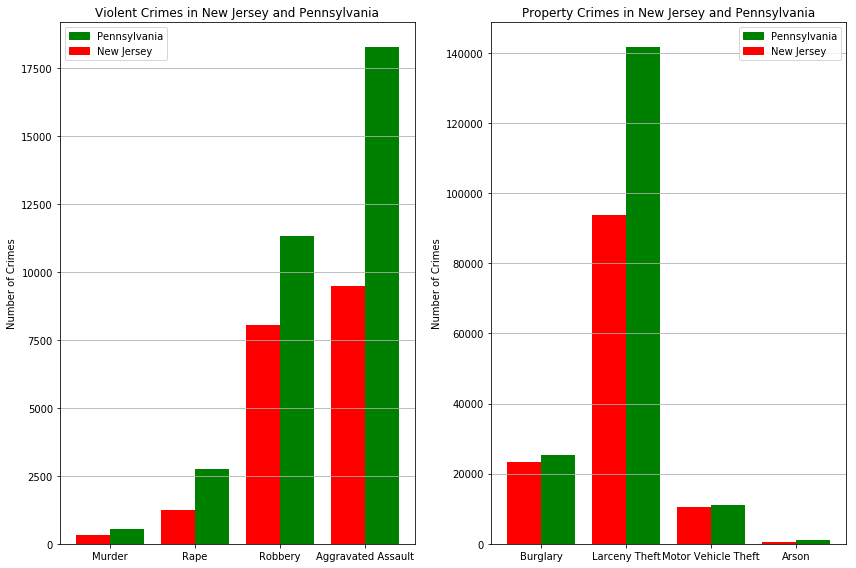

In [12]:
# dictionaries containing the totals of each crime for each state
murder = {}
rape = {}
robbery = {}
aggravated_assault = {}
burglary = {}
larceny_theft = {}
motor_vehicle_theft = {}
arson = {}

# load lists
for state, df in states.items():
    murder[state] = float(df['murder_and_nonnegligent_manslaughter'].sum())
    rape[state] = float(df['rape'].sum())
    robbery[state] = float(df['robbery'].sum())
    aggravated_assault[state] = float(df['aggravated_assault'].sum())
    burglary[state] = float(df['burglary'].sum())
    larceny_theft[state] = float(df['larceny_theft'].sum())
    motor_vehicle_theft[state] = float(df['motor_vehicle_theft'].sum())
    arson[state] = float(df['arson'].sum())
    
state_list = ['New_Jersey', 'Pennsylvania']
plt.figure(figsize=(12,8))

# Violent Crimes New Jersey and Pennsylvania
crimes = ['Murder','Rape','Robbery','Aggravated Assault']

x = np.arange(len(crimes))
y1 = [murder['New_Jersey'],rape['New_Jersey'],robbery['New_Jersey'],aggravated_assault['New_Jersey']]
y2 = [murder['Pennsylvania'],rape['Pennsylvania'],robbery['Pennsylvania'],aggravated_assault['Pennsylvania']]

# plot data
bar_width=0.4
plt.subplot(1,2,1)
plt.bar(x, y1, width=bar_width, align='center', color='red')
plt.bar(x + bar_width, y2, width=bar_width, align='center', color='green')

# set labels
plt.xticks(x + bar_width/2 , crimes)
plt.title("Violent Crimes in New Jersey and Pennsylvania")
plt.ylabel('Number of Crimes')
plt.grid(axis='y')

# legend
green_patch = mpatches.Patch(color='green', label='Pennsylvania')
red_patch = mpatches.Patch(color='red', label='New Jersey')
plt.legend(handles=[green_patch, red_patch])

# Property Crimes New Jersey and Pennsylvania
crimes = ['Burglary','Larceny Theft','Motor Vehicle Theft','Arson']

x = np.arange(len(crimes))
y1 = [burglary['New_Jersey'],larceny_theft['New_Jersey'],motor_vehicle_theft['New_Jersey'],arson['New_Jersey']]
y2 = [burglary['Pennsylvania'],larceny_theft['Pennsylvania'],motor_vehicle_theft['Pennsylvania'],arson['Pennsylvania']]

# plot data
bar_width=0.4
plt.subplot(1,2,2)
plt.bar(x, y1, width=bar_width, align='center', color='red')
plt.bar(x + bar_width, y2, width=bar_width, align='center', color='green')


# set labels
plt.xticks(x + bar_width/2 , ['Burglary','Larceny Theft','Motor Vehicle Theft','Arson'])
plt.title("Property Crimes in New Jersey and Pennsylvania")
plt.ylabel('Number of Crimes')
plt.grid(axis='y')

# legend
green_patch = mpatches.Patch(color='green', label='Pennsylvania')
red_patch = mpatches.Patch(color='red', label='New Jersey')
plt.legend(handles=[green_patch, red_patch])

plt.tight_layout()
plt.show()

In [13]:
print(state_populations['New_Jersey'])
print(state_populations['Pennsylvania'])

(state_populations['Pennsylvania'] - state_populations['New_Jersey'] )/state_populations['Pennsylvania']

8580636.0
9179018.0


0.0651901979057019

In the above figures, we chose to analyze two states with relatively close populations: New Jersey and Pennsylvania. These figures display the violent and property crimes for each state. The population for New Jersey is 8,580,636 and the population for Pennsylvania is 9,179,018. 

From the data provided, Pennsylvania is about 6.5% larger than New Jersey. However, Pennsylvania has nearly double the rape, aggravated assualt, and larceny theft than New Jersey even though both have almost the same population. Pennsylvania also has 1.25 times more robberies than New Jersey, but both states have a close number of murders, arson, burglary, and theft; in short, Pennsylvania has higher numbers of crimes for each category than New Jersey.

## Removing Philadelphia

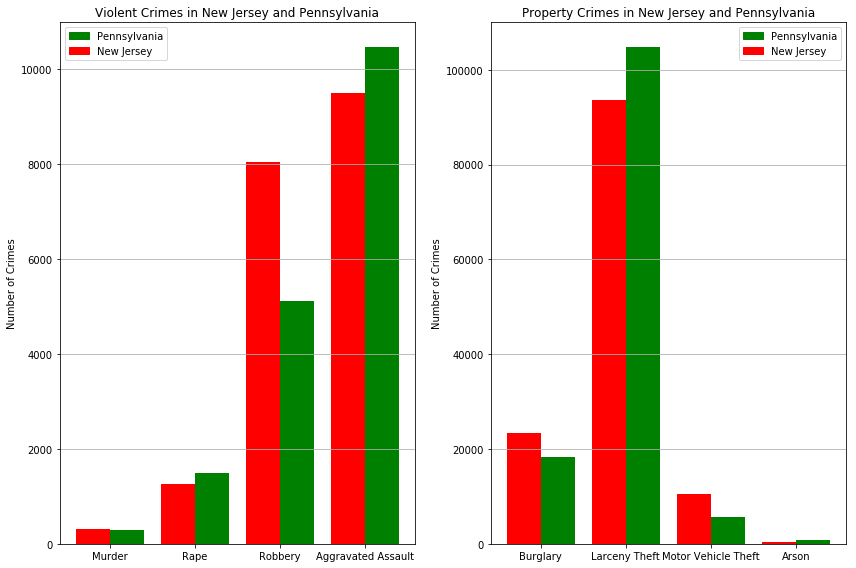

In [14]:
# remove Philadelphia from PEnnsylvania statistics
penn = states['Pennsylvania']
penn2 = penn[penn.city != 'Philadelphia']
states['Pennsylvania'] = penn2

# dictionaries containing the totals of each crime for each state
murder = {}
rape = {}
robbery = {}
aggravated_assault = {}
burglary = {}
larceny_theft = {}
motor_vehicle_theft = {}
arson = {}

# load lists
for state, df in states.items():
    murder[state] = float(df['murder_and_nonnegligent_manslaughter'].sum())
    rape[state] = float(df['rape'].sum())
    robbery[state] = float(df['robbery'].sum())
    aggravated_assault[state] = float(df['aggravated_assault'].sum())
    burglary[state] = float(df['burglary'].sum())
    larceny_theft[state] = float(df['larceny_theft'].sum())
    motor_vehicle_theft[state] = float(df['motor_vehicle_theft'].sum())
    arson[state] = float(df['arson'].sum())
    
state_list = ['New_Jersey', 'Pennsylvania']
plt.figure(figsize=(12,8))

# Violent Crimes New Jersey and Pennsylvania
crimes = ['Murder','Rape','Robbery','Aggravated Assault']

x = np.arange(len(crimes))
y1 = [murder['New_Jersey'],rape['New_Jersey'],robbery['New_Jersey'],aggravated_assault['New_Jersey']]
y2 = [murder['Pennsylvania'],rape['Pennsylvania'],robbery['Pennsylvania'],aggravated_assault['Pennsylvania']]

# plot data
bar_width=0.4
plt.subplot(1,2,1)
plt.bar(x, y1, width=bar_width, align='center', color='red')
plt.bar(x + bar_width, y2, width=bar_width, align='center', color='green')

# set labels
plt.xticks(x + bar_width/2 , crimes)
plt.title("Violent Crimes in New Jersey and Pennsylvania")
plt.ylabel('Number of Crimes')
plt.grid(axis='y')

# legend
green_patch = mpatches.Patch(color='green', label='Pennsylvania')
red_patch = mpatches.Patch(color='red', label='New Jersey')
plt.legend(handles=[green_patch, red_patch])

# Property Crimes New Jersey and Pennsylvania
crimes = ['Burglary','Larceny Theft','Motor Vehicle Theft','Arson']

x = np.arange(len(crimes))
y1 = [burglary['New_Jersey'],larceny_theft['New_Jersey'],motor_vehicle_theft['New_Jersey'],arson['New_Jersey']]
y2 = [burglary['Pennsylvania'],larceny_theft['Pennsylvania'],motor_vehicle_theft['Pennsylvania'],arson['Pennsylvania']]

# plot data
bar_width=0.4
plt.subplot(1,2,2)
plt.bar(x, y1, width=bar_width, align='center', color='red')
plt.bar(x + bar_width, y2, width=bar_width, align='center', color='green')


# set labels
plt.xticks(x + bar_width/2 , ['Burglary','Larceny Theft','Motor Vehicle Theft','Arson'])
plt.title("Property Crimes in New Jersey and Pennsylvania")
plt.ylabel('Number of Crimes')
plt.grid(axis='y')

# legend
green_patch = mpatches.Patch(color='green', label='Pennsylvania')
red_patch = mpatches.Patch(color='red', label='New Jersey')
plt.legend(handles=[green_patch, red_patch])

plt.tight_layout()
plt.show()

When comparing two states of similar geographic proximity and population size, we hypothesized that the two states would have similar rates of crime, but that was not the case. Looking further into this, when we remove the Pennsylvania city with the largest population (Philadelphia), Pennsylvania's crime statistics are much closer to those of New Jersey. This is alarming that a single city can have crime rates close to those of an entire state. In fact, after removing Philadelphia from the dataset, New Jersey actually had more robberies, motor vehicle thefts and burglaries than Pennsylvania.

Furthermore, after analyzing Philadelphia, it was found that a city which makes up 17% of Pennsylvania's total population is responsible for the following percentages of each crime in the state:
- Violent Crime: 47%
  - Murder: 49%
  - Rape: 46%
  - Robbery: 55%
  - Aggravated Assault: 43%
- Property Crimes: 28%
  - Burglary: 28%
  - Larceny: 26%
  - Motor Vehicle Theft: 49%
  - Arson: 34%

For comparison, Newark, New Jersey's largest city by population, makes up 3% of the state's total population and contributes the following crime rates to the state:
- Violent Crime: 14%
  - Murder: 33%
  - Rape: 8%
  - Robbery: 17%
  - Aggravated Assault: 12%
- Property Crime: 5%
  - Burglary: 5%
  - Larceny: 3%
  - Motor Vehicle Theft:20%
  - Arson: 9%

Now, Philadelphia has population of 1,570,826 people and Newark has a population of 281,450, roughly 5.6 times smaller than Philadelphia. At the rate of crime in Newark, if it were the size of Philadelphia and the crimes were all multiplied by 5.6, the rates of Newark change to 16% of the state's population and the following crimes rates:
- Violent Crime: 47%
  - Murder: 73%
  - Rape: 32%
  - Robbery: 53%
  - Aggravated Assault: 42%
- Property Crime: 23%
  - Burglary: 22%
  - Larceny: 16%
  - Motor Vehicle Theft: 59%
  - Arson: 35%
  
This extrapolation of Newark's size to that of Philadelphia shows that the two cities have extremely similar per capita crime rates

# Machine Learning

Now we want to implement two machine learning algorithms and try to predict how many rape crimes happened for a set of features given in the test set.

## Linear Regression


In [15]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

First we combine all the data into a single dataframe for the model:

In [16]:
# combine all the data
alldata = pd.concat(states.values(), ignore_index=True)

# drop unneeded columns
alldata = alldata.drop(['city', 'violent_crime', 'property_crime', 'arson'], axis = 1)
alldata = alldata.fillna(0)

# extract features, without the target label we want to predict
features = alldata.drop(['rape'], axis = 1)
labels = alldata.drop(['population','murder_and_nonnegligent_manslaughter', 'robbery', 'aggravated_assault', 'burglary', 'larceny_theft', 'motor_vehicle_theft'], axis = 1)

# show all data statistics
alldata.describe()


,population,murder_and_nonnegligent_manslaughter,rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
count,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,2.150758e+04,15.735749,9.345584,28.573293,62.990812,109.598455,435.164126,60.450407
std,1.200952e+05,1415.502120,64.272455,299.141307,598.847315,621.021595,2264.978009,431.990339
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.228250e+03,0.000000,0.000000,0.000000,1.000000,5.000000,19.000000,1.000000
50%,5.800500e+03,0.000000,1.000000,1.000000,6.000000,16.000000,73.000000,4.000000
75%,1.633050e+04,0.000000,5.000000,6.000000,22.000000,57.000000,278.750000,18.000000
max,8.566917e+06,138527.000000,3149.000000,15544.000000,31661.000000,26402.000000,106868.000000,18591.000000


In [17]:
# show features statistics
features.describe()

,population,murder_and_nonnegligent_manslaughter,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
count,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,2.150758e+04,15.735749,28.573293,62.990812,109.598455,435.164126,60.450407
std,1.200952e+05,1415.502120,299.141307,598.847315,621.021595,2264.978009,431.990339
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.228250e+03,0.000000,0.000000,1.000000,5.000000,19.000000,1.000000
50%,5.800500e+03,0.000000,1.000000,6.000000,16.000000,73.000000,4.000000
75%,1.633050e+04,0.000000,6.000000,22.000000,57.000000,278.750000,18.000000
max,8.566917e+06,138527.000000,15544.000000,31661.000000,26402.000000,106868.000000,18591.000000


And these are statistics for the labels corresponding to the features:

In [18]:
# show label (rape) statistics:
labels.describe()

,rape
count,9578.000000
mean,9.345584
std,64.272455
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,3149.000000


### Defining the Linear Regression Model

In [19]:
# linear regression:
reg = linear_model.LinearRegression()

# we split the data, with 0.8 of the data for training and 0.2 for testing, random_state=4 for shuffeling
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=4)
x_train.head()

,population,murder_and_nonnegligent_manslaughter,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
3219,12914.0,0,18.0,36.0,34.0,156.0,18.0
6252,2621.0,0,0.0,7.0,4.0,42.0,1.0
4062,5021.0,0,0.0,2.0,6.0,21.0,7.0
5452,11921.0,2,5.0,32.0,286.0,165.0,21.0
4308,15873.0,0,7.0,12.0,56.0,222.0,23.0


### Fitting the Model

In [20]:
# fit the model
reg.fit(x_train,y_train)
print('done')

done


In [21]:
# print the results (weights) from the model
reg.coef_

array([[ 0.00022512,  0.01373557, -0.02398544,  0.01072603,  0.03209537,
         0.00043426,  0.03189461]])

### Prediction

In [22]:
# predict rape count
reg.predict(x_test)

array([[-0.93993571],
       [ 0.06346176],
       [ 3.59608203],
       ...,
       [14.00140456],
       [-0.79249988],
       [ 2.60064796]])

In [23]:
# compare a value to see how close we are 
a=reg.predict(x_test)
print("predicted value:", a[4])
print("actual value:", y_test.iloc[4])
# we can see that it is closse, but we have some error

predicted value: [124.2232583]
actual value: rape    133
Name: 6166, dtype: int64


In [134]:
# now we calculate the mean square error:
np.mean((reg.predict(x_test) - y_test)**2)
# we can see that our mean square error is huge, because we used linear regression for this and it might not be so efficient

rape    134.693541
dtype: float64

#### From just looking at the data above, we can observe that our predictions were very close in many cases.

### Visualizing the Results

[0.10050618 3.01461784]


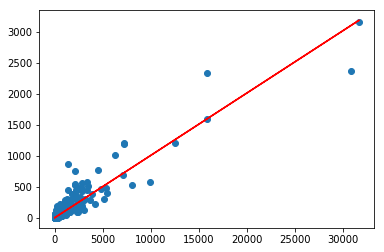

In [25]:
# not sure how to do visualization 
rape_x = alldata['aggravated_assault']
rape_y = alldata['rape']

p1 = np.polyfit(rape_x, rape_y, 1)
plt.scatter(rape_x, rape_y)
plt.plot(rape_x, np.polyval(p1,rape_x), 'r')

print(p1)

In [137]:
reg.predict(x_test)

array([[-0.93993571],
       [ 0.06346176],
       [ 3.59608203],
       ...,
       [14.00140456],
       [-0.79249988],
       [ 2.60064796]])

_____________

# Perceptron

We are using a precpetron learning algorithm to predict rape crimes based on all of the other features.

In [27]:
# let's try another learning algorithm: Perceptron
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from matplotlib import rcParams
rcParams["figure.figsize"] = 10,5
%matplotlib inline

### Preparing to start the algorithm:

In [28]:

# create instance
sc = StandardScaler()

# fit the scalar to the training features
sc.fit(x_train)

# we transform the training and test sets using the fitted scaler
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
x_train_std = x_train_std[:, [2, 3]]
x_test_std = x_test_std[:, [2, 3]]
print('done')

done


### Training the data:

In [29]:
# now we train the model using perceptron
# define # of iterations
iter = 55
alpha = 5 # learning rate

# create percpetron instance:
perc = Perceptron(max_iter=iter, eta0=alpha, random_state=0)

# fit the model
perc.fit(x_train_std, y_train.values.ravel())
print('done')

done


### Prediction

In [30]:
# now we predict
predictions = perc.predict(x_test_std)

# measure accuracy:
print("accuracy: ", (accuracy_score(y_test, predictions)*100), "%")

# around 41.3% accuracy, which is reasonable compared to the size of data and the number of different labels possible!

accuracy:  41.33611691022965 %


## Perceptron 2 - Binary Classifying for Increased Accuracy

In [115]:
# make copies of all data
alldata2 = alldata.copy(deep=True)
features2 = features.copy(deep=True)
labels2 = labels.copy(deep=True)

### Change rape data to 0 for < 5 and 1 for > 5

In [116]:
def norm(num):
    return 0 if num <= 10 else 1

labels2 = labels2['rape'].apply(norm)

### Split the data into training and testing

In [119]:
# we split the data, with 0.8 of the data for training and 0.2 for testing, random_state=4 for shuffeling
x_train2, x_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.2, random_state=4)
# x_train2.head()

In [ ]:
# create instance
sc2 = StandardScaler()

# fit the scalar to the training features
sc2.fit(x_train2)

# we transform the training and test sets using the fitted scaler
x_train_std2 = sc2.transform(x_train2)
x_test_std2 = sc2.transform(x_test2)
x_train_std2 = x_train_std2[:, [2, 3]]
x_test_std2 = x_test_std2[:, [2, 3]]
print('done')

### Train new Perceptron and test its accuracy

In [121]:
# now we train the model using perceptron
# define # of iterations
iter2 = 55
alpha2 = 0.1 # learning rate

# create percpetron instance:
perc2 = Perceptron(max_iter=iter2, eta0=alpha2, random_state=0)

# fit the model
perc2.fit(x_train_std2, y_train2.values.ravel())
print('done')

done


In [122]:
# now we predict
predictions2 = perc2.predict(x_test_std2)

# measure accuracy:
print("accuracy: ", (accuracy_score(y_test2, predictions2)*100), "%")

# around 41.3% accuracy, which is reasonable compared to the size of data and the number of different labels possible!

accuracy:  92.74530271398747 %


Accuracy increased to 92.75% when we took a more binary approach to classification and prediction. By changing the label data for rapes to 0 for <= 10 rapes per city and 1 for > 10, we can predict these ranges much more accurately than the 43% accuracy of guessing the actual number of rapes in a particular city. Of that 43% accuracy, 785 of the 793 correct predictions were predicitions of the value '0', so our standard Perceptron was getting the majority of its correct predictions by predicting 0. It also over-corrected in its predictions, guessing 0 over 1600 times out of the 1916 data points, so to say that it correctly predicted all true 0 rapes per city is less impactful when it guessed 0 for nearly 85% of the data (when only 40% of the data were true 0's).

## Elastic Net

In [176]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

ENet = ElasticNet(alpha=0.1)
enet = ENet.fit(x_train, y_train)

In [177]:
# compare a value to see how close we are 
e=enet.predict(x_test)

print("predicted value:", e[4])
print("actual value:", y_test.iloc[4])

predicted value: 124.22412501283426
actual value: rape    133
Name: 6166, dtype: int64


In [178]:
mse = mean_squared_error(y_test,enet.predict(x_test))
print("The mean-squared error for Elastic Net regression is ",mse)

The mean-squared error for Elastic Net regression is  134.6871208474744


The Mean-Squared Average for both Linear Regression and Elastic Net are almost identical (134.69 and 134.68 respectively). This could be due to the fact that both are regression models and the features we provided may not have been the most optimal or informative for the Machine Learning algorithms. 